In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('/Users/christopheryang/Desktop/clean data for analysis/cleanbackup.csv')  # Adjust path if needed
df.head()

,IgA ASCA EU,IgA ASCA Pos.,IgG ASCA EU,IgG ASCA Pos.,ASCA Panel,OmpC. EU,OmpC Pos.,Cbir1 EU,CBir1 Fla. Pos.,ANCA EU,...,Gemmiger_formicilis,GGB58485_SGB80143,age,sex_Female,sex_Male,race_American Indian or Alaska Native,race_Black or African American,race_More than one race,race_Other,race_White
0,56.0,1.0,0.0,0.0,1.0,12.0,0.0,11.0,0.0,5.0,...,0.000000,0.000000,30,0,1,0,0,0,0,1
1,1.0,0.0,2.0,0.0,0.0,14.0,0.0,8.0,0.0,4.0,...,0.000106,0.000047,40,1,0,0,0,0,0,1
2,1.0,0.0,2.0,0.0,0.0,5.0,0.0,24.0,0.0,125.0,...,0.000000,0.000000,7,1,0,0,1,0,0,0
3,1.0,0.0,2.0,0.0,0.0,5.0,0.0,24.0,0.0,125.0,...,0.000000,0.000000,7,1,0,0,1,0,0,0
4,1.0,0.0,2.0,0.0,0.0,5.0,0.0,24.0,0.0,125.0,...,0.000000,0.000000,7,1,0,0,1,0,0,0


In [17]:
# Identify columns
target_col = 'ANCA EU'
# Demographic columns
demographic_cols = [col for col in df.columns if col.startswith('age') or col.startswith('sex_') or col.startswith('race_')]
# Microbiome columns: those between 'sample_name' and 'age'
sample_name_idx = df.columns.get_loc('sample_name')
age_idx = df.columns.get_loc('age')
microbiome_cols = df.columns[sample_name_idx+1:age_idx]
# Combine features
feature_cols = list(microbiome_cols) + demographic_cols


In [18]:
# Compute correlations
correlations = df[feature_cols].corrwith(df[target_col])
correlations = correlations.dropna().sort_values(key=abs, ascending=False)
correlations.head(20)  # Show top 20 absolute correlations

Acidaminococcus_intestini           0.307590
Bacteroides_eggerthii               0.279866
Bacteroides_fragilis                0.228445
Bacteroides_stercoris              -0.225437
sex_Male                           -0.208458
sex_Female                          0.208458
Roseburia_inulinivorans             0.202932
Phocaeicola_vulgatus                0.160521
Parasutterella_excrementihominis   -0.158370
Clostridiales_bacterium            -0.153535
Prevotella_copri_clade_A           -0.150584
Ruminococcus_gnavus                 0.146916
Clostridium_fessum                 -0.143840
race_Black or African American      0.141618
Clostridium_sp_AF36_4               0.137693
Alistipes_finegoldii               -0.137156
Eubacterium_rectale                 0.129677
Paraprevotella_clara               -0.125919
Clostridium_symbiosum               0.115884
Clostridiaceae_bacterium           -0.115816
dtype: float64

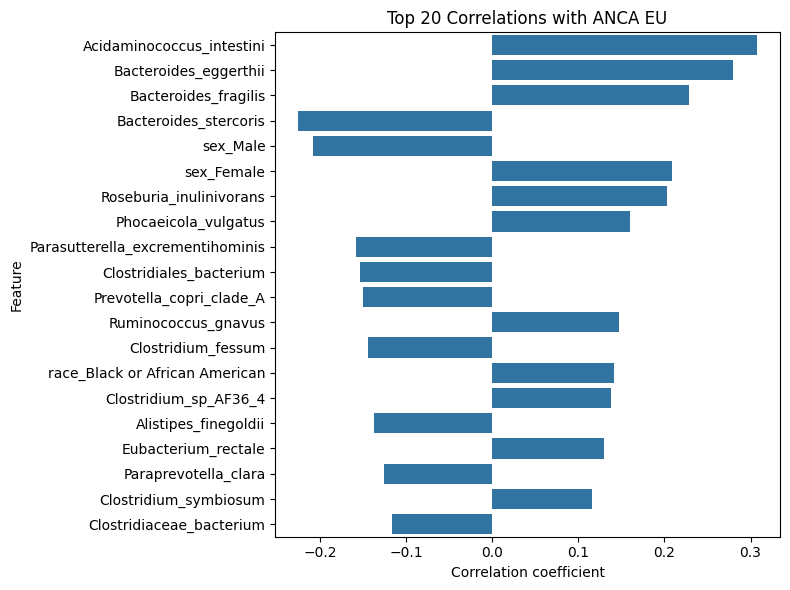

In [19]:
plt.figure(figsize=(8, 6))
sns.barplot(x=correlations.head(20).values, y=correlations.head(20).index, orient='h')
plt.title('Top 20 Correlations with ' + str(target_col))
plt.xlabel('Correlation coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()